## Imports

In [8]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, gradient_descent, OLS, prepare_data, polynomial_features, Ridge
importlib.reload(gradient_descent)
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)
importlib.reload(Ridge)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from gradient_descent import gradient_descent_OLS, gradient_descent_Ridge, \
    momentum_gradient_descent_OLS, momentum_gradient_descent_Ridge, \
        ADAGrad_gradient_descent_OLS, ADAGrad_gradient_descent_Ridge, \
        RMSProp_gradient_descent_OLS, RMSProp_gradient_descent_Ridge,  \
        ADAM_gradient_descent_OLS, ADAM_gradient_descent_Ridge
from OLS import OLS_parameters
from Ridge import Ridge_parameters

# Styling function
from Set_latex_params import set_mpl_latex_style
set_mpl_latex_style()


## Testing functions

### Gradient Descent with momentum, OLS

In [9]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 9
# Momentum
mom = 0.9

eta = 1e-1

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = momentum_gradient_descent_OLS(X_train_s, y_train, eta=eta, momentum=mom, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.02399754 -2.17022719  0.13507465  6.18373532 -0.16311327 -7.11578378
 -0.06838117  2.87386513  0.12505772]
Number of iterations: 100000
Closed-form OLS coefficients:  [-0.0225844  -2.17035032  0.12193737  6.18488693 -0.12361183 -7.11824041
 -0.11534704  2.87533016  0.14434382]
GD parameters equal to closed-form parameters: [False  True False  True False  True False  True False].
Tolerance = 0.001


### Gradient Descent with momentum, Ridge

In [10]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 12
lam = 0.001
eta = 1e-3
mom = 0.9

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = momentum_gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=eta, momentum=mom, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.02825481 -2.07310572  0.16980668  5.73904234 -0.29755993 -5.90692072
  0.10521917  0.18696607  0.12482474  3.26401753 -0.0739142  -1.44416426]
Number of iterations: 100000
Closed-form Ridge coefficients:  [-0.02823547 -2.0857958   0.17182606  5.82212846 -0.30706498 -6.08124119
  0.1138234   0.2967647   0.13117538  3.30600763 -0.0816156  -1.49235448]
GD parameters equal to closed-form parameters: [ True  True  True False  True False  True False  True  True  True False].
Tolerance = 0.01


### Gradient Descent with ADAGrad, OLS

In [11]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8

eta = 1e-1

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAGrad_gradient_descent_OLS(X_train_s, y_train, eta=eta, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.03441359 -2.05738066  0.21436727  5.64738487 -0.38969629 -6.31056542
  0.21283848  2.49075218]
Number of iterations: 100000
Closed-form OLS coefficients:  [-0.03172183 -2.16960132  0.21194351  6.17747521 -0.40515686 -7.10165138
  0.22890591  2.86511371]
GD parameters equal to closed-form parameters: [False False False False False False False False].
Tolerance = 0.001


### Gradient Descent with ADAGrad, Ridge

In [12]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 12
lam = 0.001
eta = 1e-1


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAGrad_gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=eta, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-3.50588530e-02 -1.76915041e+00  1.67533549e-01  3.83925941e+00
 -1.69037668e-01 -2.35343192e+00 -4.08597105e-02 -9.58840819e-01
 -2.11778361e-03  7.71558350e-01  8.49207699e-02  2.44719509e-01]
Number of iterations: 100000
Closed-form Ridge coefficients:  [-0.02823547 -2.0857958   0.17182606  5.82212846 -0.30706498 -6.08124119
  0.1138234   0.2967647   0.13117538  3.30600763 -0.0816156  -1.49235448]
GD parameters equal to closed-form parameters: [ True False  True False False False False False False False False False].
Tolerance = 0.01


### Gradient Descent with RMSProp, OLS

In [13]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 7

eta = 1e-4

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = RMSProp_gradient_descent_OLS(X_train_s, y_train, eta=eta, num_iters=100000, print_num_iters=True)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

Number of iterations:  29693
GD parameters:  [-0.05126129 -1.38961452  0.23841433  2.32259485 -0.30358087 -1.17527283
  0.11325439]
Number of iterations: 29693
Closed-form OLS coefficients:  [-0.05027515 -1.39111494  0.23341283  2.32637729 -0.29510162 -1.1778056
  0.10896717]
GD parameters equal to closed-form parameters: [ True  True False False False False False].
Tolerance = 0.001


### Gradient Descent with RMSProp, Ridge

In [14]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 10
lam = 10
eta = 1e-5


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = RMSProp_gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=eta, num_iters=500000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02372144 -0.24674956  0.00131243 -0.0255325   0.00711506  0.02958821
  0.00592425  0.03934535  0.00334517  0.03538869]
Number of iterations: 500000
Closed-form Ridge coefficients:  [-0.02372644 -0.24674456  0.00130743 -0.0255275   0.00711006  0.02959321
  0.00591925  0.03935035  0.00334017  0.03539369]
GD parameters equal to closed-form parameters: [ True  True  True  True  True  True  True  True  True  True].
Tolerance = 0.01


### Gradient Descent with ADAM, OLS

In [15]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 9

eta = 1e-1

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAGrad_gradient_descent_OLS(X_train_s, y_train, eta=eta, num_iters=1000000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02339353 -2.17028882  0.1294631   6.18427017 -0.14624537 -7.11689734
 -0.08843428  2.87452131  0.13329218]
Number of iterations: 1000000
Closed-form OLS coefficients:  [-0.0225844  -2.17035032  0.12193737  6.18488693 -0.12361183 -7.11824041
 -0.11534704  2.87533016  0.14434382]
GD parameters equal to closed-form parameters: [ True  True False  True False  True False  True False].
Tolerance = 0.001


### Gradient Descent with ADAM, Ridge

In [16]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 4
lam = 0.01
eta = 1e-2


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAM_gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=eta, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02259892 -0.70002187  0.02685686  0.50547903]
Number of iterations: 673
Closed-form Ridge coefficients:  [-0.0225989  -0.70002216  0.02685685  0.50547932]
GD parameters equal to closed-form parameters: [ True  True  True  True].
Tolerance = 0.01


## Computing parameters with different gradient descent methods

### OLS

In [17]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Initialize variables:
deg_max = 15
eta = 1e-2
num_iters = 500000

# Lists for MSEs
MSE_closed_form_OLS = []
MSE_gd_fixed_learning_rate_OLS = []
MSE_gd_momentum_OLS = []
MSE_gd_ADAGrad_OLS = []
MSE_gd_RMSProp_OLS = []
MSE_gd_ADAM_OLS = []

# Lists for R2-scores
R2_score_closed_form_OLS=[]
R2_gd_fixed_learning_rate_OLS = []
R2_gd_momentum_OLS = []
R2_gd_ADAGrad_OLS = []
R2_gd_RMSProp_OLS = []
R2_gd_ADAM_OLS = []

# Lists for n_iterations
num_iterations_gd_fixed_learning_rate_OLS = []
num_iterations_gd_momentum_OLS = []
num_iterations_gd_ADAGrad_OLS = []
num_iterations_gd_RMSProp_OLS = []
num_iterations_gd_ADAM_OLS = []

# Loop over degrees
for p in range(1, deg_max+1):
    
    # Make feature matrices, scale
    X_plot = polynomial_features(x, p, intercept=False)
    X_train = polynomial_features(x_train, p, intercept=False)
    X_test  = polynomial_features(x_test, p, intercept=False)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute parameters with gradient descent methods and analytical solutions
    beta_closed = OLS_parameters(X_train_s, y_train)
    # Fixed learning rate:
    beta_gd_fixed_rate, t = gradient_descent_OLS(X_train_s, y_train, eta = 1e-1, num_iters=num_iters)
    num_iterations_gd_fixed_learning_rate_OLS.append(t)
    # With momentum:
    beta_gd_momentum, t = momentum_gradient_descent_OLS(X_train_s, y_train, eta = 1e-1, momentum = 0.9, num_iters=num_iters)
    num_iterations_gd_momentum_OLS.append(t)
    # With ADAGrad:
    beta_gd_ADAGrad, t = ADAGrad_gradient_descent_OLS(X_train_s, y_train, eta = 1e-1, num_iters=num_iters)
    num_iterations_gd_ADAGrad_OLS.append(t)
    # With RMSProp:
    beta_gd_RMSProp, t = RMSProp_gradient_descent_OLS(X_train_s, y_train, eta = 1e-4, num_iters=num_iters)
    num_iterations_gd_RMSProp_OLS.append(t)
    # With ADAM:
    beta_gd_ADAM, t = ADAM_gradient_descent_OLS(X_train_s, y_train, eta = eta, num_iters=num_iters)
    num_iterations_gd_ADAM_OLS.append(t)
    
    # Compute y_offset
    y_offset = np.mean(y_train)
    # Predict
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd_fixed_rate = X_test_s @ beta_gd_fixed_rate + y_offset
    y_pred_momentum = X_test_s @ beta_gd_momentum + y_offset
    y_pred_ADAGrad = X_test_s @ beta_gd_ADAGrad + y_offset
    y_pred_RMSProp = X_test_s @ beta_gd_RMSProp + y_offset
    y_pred_ADAM = X_test_s @ beta_gd_ADAM + y_offset
    
    # Append MSEs
    MSE_closed_form_OLS.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_fixed_learning_rate_OLS.append(mean_squared_error(y_test, y_pred_gd_fixed_rate))
    MSE_gd_momentum_OLS.append(mean_squared_error(y_test, y_pred_momentum))
    MSE_gd_ADAGrad_OLS.append(mean_squared_error(y_test, y_pred_ADAGrad))
    MSE_gd_RMSProp_OLS.append(mean_squared_error(y_test, y_pred_RMSProp))
    MSE_gd_ADAM_OLS.append(mean_squared_error(y_test, y_pred_ADAM))

    
    # Append R2 scores
    R2_score_closed_form_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_gd_fixed_learning_rate_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_gd_fixed_rate))
    R2_gd_momentum_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_momentum))
    R2_gd_ADAGrad_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_ADAGrad))
    R2_gd_RMSProp_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_RMSProp))
    R2_gd_ADAM_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_ADAM))


### Plotting the results

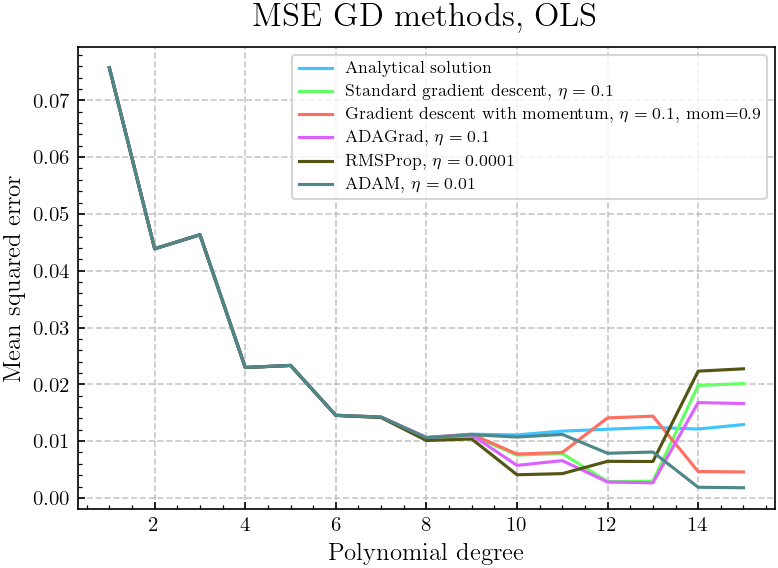

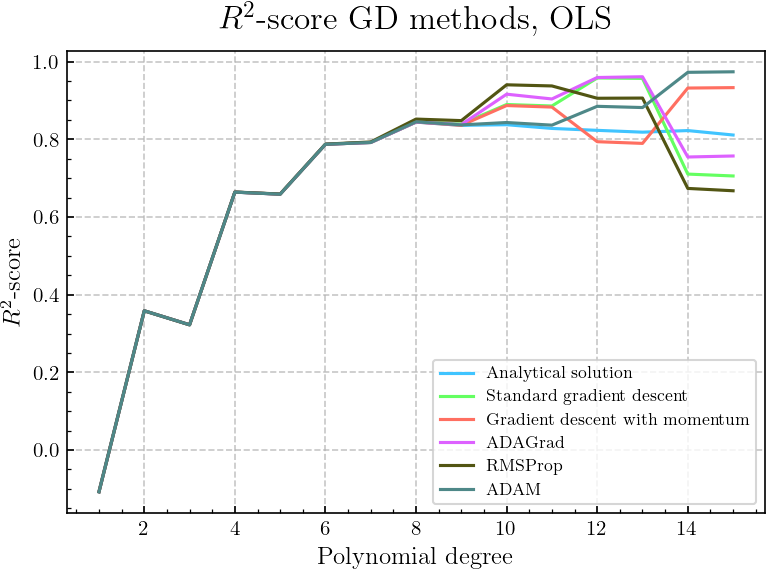

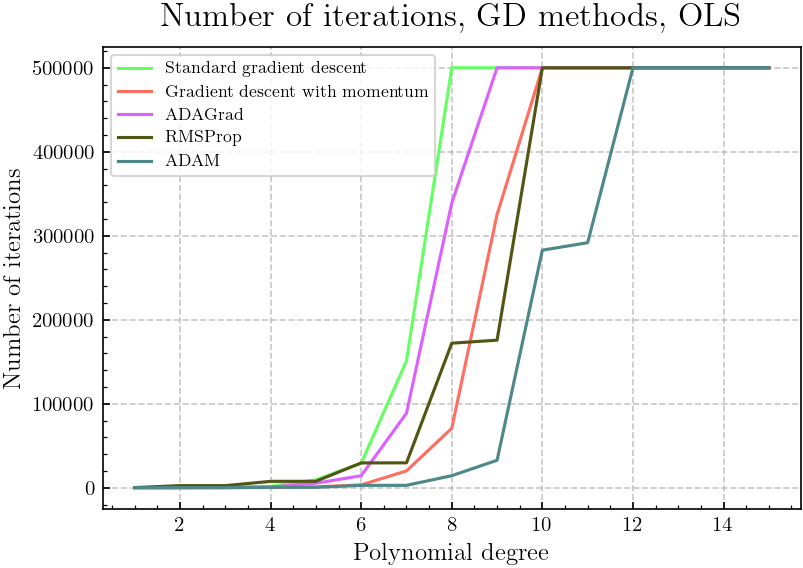

In [18]:
### Plotting results
degrees = np.arange(1, deg_max+1)

# MSE

plt.figure()
plt.plot(degrees, MSE_closed_form_OLS, label="Analytical solution", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_gd_fixed_learning_rate_OLS, label="Standard gradient descent, $\eta=0.1$", color="#64FF61", linewidth=1.5)
plt.plot(degrees, MSE_gd_momentum_OLS, label="Gradient descent with momentum, $\eta=0.1$, mom=0.9 ", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, MSE_gd_ADAGrad_OLS, label="ADAGrad, $\eta = 0.1$", color="#DD61FF", linewidth=1.5)
plt.plot(degrees, MSE_gd_RMSProp_OLS, label="RMSProp, $\eta = 0.0001$ ", color="#525513", linewidth=1.5)
plt.plot(degrees, MSE_gd_ADAM_OLS, label="ADAM, $\eta = 0.01$ ", color='#4E8888', linewidth=1.5)
plt.title("MSE GD methods, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/MSE_gradient_descent_methods_OLS.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, R2_score_closed_form_OLS, label="Analytical solution", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_gd_fixed_learning_rate_OLS, label="Standard gradient descent", color='#64FF61', linewidth=1.5)
plt.plot(degrees, R2_gd_momentum_OLS, label="Gradient descent with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, R2_gd_ADAGrad_OLS, label="ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(degrees, R2_gd_RMSProp_OLS, label="RMSProp", color="#525513", linewidth=1.5)
plt.plot(degrees, R2_gd_ADAM_OLS, label="ADAM", color="#4E8888", linewidth=1.5)
plt.title("$R^2$-score GD methods, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("$R^2$-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/r2_gradient_descent_methods_OLS.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, num_iterations_gd_fixed_learning_rate_OLS, label="Standard gradient descent", color='#64FF61', linewidth=1.5)
plt.plot(degrees, num_iterations_gd_momentum_OLS, label="Gradient descent with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, num_iterations_gd_ADAGrad_OLS, label="ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(degrees, num_iterations_gd_RMSProp_OLS, label="RMSProp", color='#525513', linewidth=1.5)
plt.plot(degrees, num_iterations_gd_ADAM_OLS, label="ADAM", color='#4E8888', linewidth=1.5)
plt.title("Number of iterations, GD methods, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/number_of_iterations_gradient_descent_methods_OLS.pdf", bbox_inches="tight")
plt.show()

### Ridge

In [19]:
# Prepare data:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 13
mom = 0.9
lambdas = np.logspace(-5, 2,20)
eta = 1e-3
num_iters = 500000
mom = 0.9

# Lists for MSEs
MSE_closed_form_Ridge = []
MSE_gd_fixed_learning_rate_Ridge = []
MSE_gd_momentum_Ridge = []
MSE_gd_ADAGrad_Ridge = []
MSE_gd_RMSProp_Ridge = []
MSE_gd_ADAM_Ridge = []

# Lists for R2-scores
R2_score_closed_form_Ridge=[]
R2_gd_fixed_learning_rate_Ridge = []
R2_gd_momentum_Ridge = []
R2_gd_ADAGrad_Ridge = []
R2_gd_RMSProp_Ridge = []
R2_gd_ADAM_Ridge = []

# Lists for n_iterations
num_iterations_gd_fixed_learning_rate_Ridge = []
num_iterations_gd_momentum_Ridge = []
num_iterations_gd_ADAGrad_Ridge = []
num_iterations_gd_RMSProp_Ridge = []
num_iterations_gd_ADAM_Ridge = []

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

y_offset = np.mean(y_train)

for l in lambdas:
    # Computing parameters with the different methods:
    # Analytical solution
    beta_closed = Ridge_parameters(X_train_s, y_train, l)
    # Gradient descent, fixed learning rate:
    beta_gd_fixed_rate, t = gradient_descent_Ridge(X_train_s, y_train, lam=l, eta=1e-4, num_iters=num_iters)
    num_iterations_gd_fixed_learning_rate_Ridge.append(t)
    # Gradient descent with momentum
    beta_gd_momentum, t = momentum_gradient_descent_Ridge(X_train_s, y_train, lam=l, eta=1e-3, momentum=mom, num_iters=num_iters)
    num_iterations_gd_momentum_Ridge.append(t)
    # Gradient descent with ADAGrad
    beta_gd_ADAGrad, t = ADAGrad_gradient_descent_Ridge(X_train_s, y_train, lam=l, eta=1e-1, num_iters=num_iters)
    num_iterations_gd_ADAGrad_Ridge.append(t)
    # Gradient descent with RMSProp
    beta_gd_RMSProp, t = RMSProp_gradient_descent_Ridge(X_train_s, y_train, lam=l, eta=1e-5, num_iters=num_iters)
    num_iterations_gd_RMSProp_Ridge.append(t)
    # Gradient descent with ADAM
    beta_gd_ADAM, t = ADAM_gradient_descent_Ridge(X_train_s, y_train, lam=l, eta=1e-2, num_iters=num_iters)
    num_iterations_gd_ADAM_Ridge.append(t)
    
    # Predict
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd_fixed_rate = X_test_s @ beta_gd_fixed_rate + y_offset
    y_pred_momentum = X_test_s @ beta_gd_momentum + y_offset
    y_pred_ADAGrad = X_test_s @ beta_gd_ADAGrad + y_offset
    y_pred_RMSProp = X_test_s @ beta_gd_RMSProp + y_offset
    y_pred_ADAM = X_test_s @ beta_gd_ADAM + y_offset
    
    # Append MSEs
    MSE_closed_form_Ridge.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_fixed_learning_rate_Ridge.append(mean_squared_error(y_test, y_pred_gd_fixed_rate))
    MSE_gd_momentum_Ridge.append(mean_squared_error(y_test, y_pred_momentum))
    MSE_gd_ADAGrad_Ridge.append(mean_squared_error(y_test, y_pred_ADAGrad))
    MSE_gd_RMSProp_Ridge.append(mean_squared_error(y_test, y_pred_RMSProp))
    MSE_gd_ADAM_Ridge.append(mean_squared_error(y_test, y_pred_ADAM))

    
    # Append R2 scores
    R2_score_closed_form_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_gd_fixed_learning_rate_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_gd_fixed_rate))
    R2_gd_momentum_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_momentum))
    R2_gd_ADAGrad_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_ADAGrad))
    R2_gd_RMSProp_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_RMSProp))
    R2_gd_ADAM_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_ADAM))
    

### Plotting the results

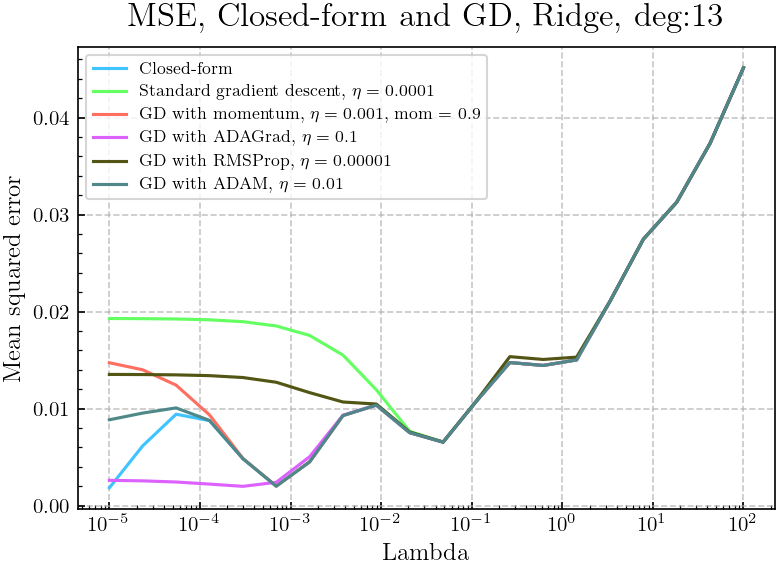

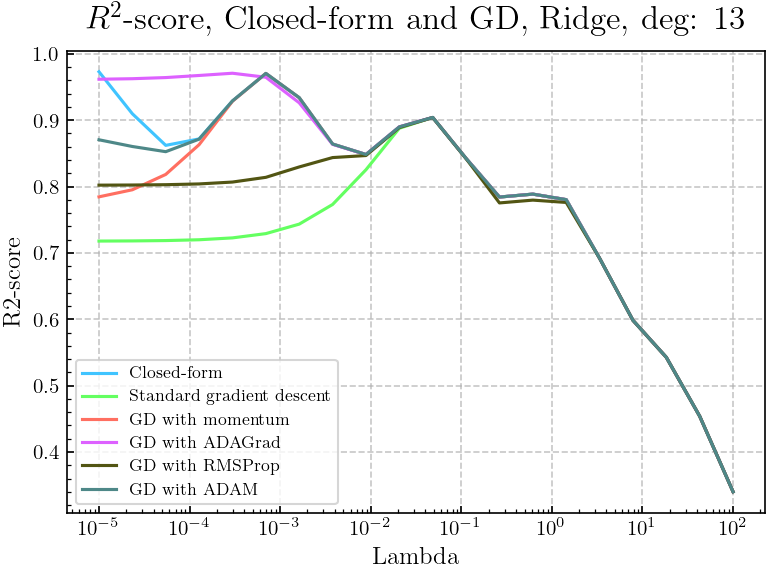

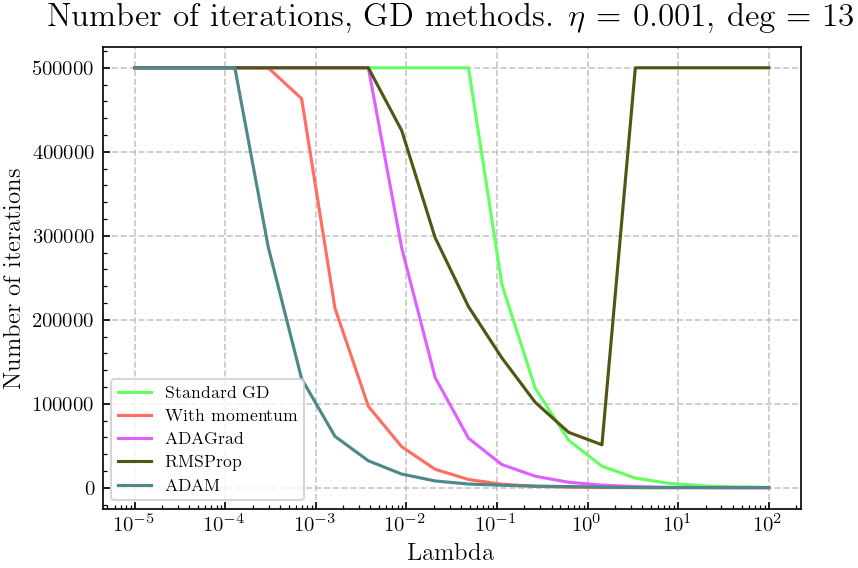

In [21]:
# MSEs
plt.figure()
plt.plot(lambdas, MSE_closed_form_Ridge, label="Closed-form", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_fixed_learning_rate_Ridge, label="Standard gradient descent, $\eta = 0.0001$", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_momentum_Ridge, label="GD with momentum, $\eta = 0.001$, mom = 0.9", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAGrad_Ridge, label="GD with ADAGrad, $\eta = 0.1$", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_RMSProp_Ridge, label="GD with RMSProp, $\eta = 0.00001$", color='#525513', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAM_Ridge, label="GD with ADAM, $\eta = 0.01$", color='#4E8888', linewidth=1.5)
plt.title(f"MSE, Closed-form and GD, Ridge, deg:{p} ", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/mse_gradient_descent_methods_Ridge.pdf", bbox_inches="tight")
plt.show()


# R2-scores
plt.plot(lambdas, R2_score_closed_form_Ridge, label="Closed-form", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_fixed_learning_rate_Ridge, label="Standard gradient descent", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, R2_gd_momentum_Ridge, label="GD with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAGrad_Ridge, label="GD with ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_RMSProp_Ridge, label="GD with RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAM_Ridge, label="GD with ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"$R^2$-score, Closed-form and GD, Ridge, deg: {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("R2-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/r2_gradient_descent_methods_Ridge.pdf", bbox_inches="tight")
plt.show()


# Number of iterations
plt.plot(lambdas, num_iterations_gd_fixed_learning_rate_Ridge, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_momentum_Ridge, label="With momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_ADAGrad_Ridge, label="ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_RMSProp_Ridge, label="RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_ADAM_Ridge, label="ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"Number of iterations, GD methods. $\eta$ = {eta}, deg = {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/number_of_iterations_gradient_descent_methods_Ridge.pdf", bbox_inches="tight")
plt.show()